#Task 1

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

#!pip install shap
import shap

shap.initjs()

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv')

df.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.473,2.326,26.07,0.007802,0.02052,0.01341,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.907,3.149,30.66,0.006587,0.01815,0.01737,0.013160,0.01835,0.002318,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.64,0.007189,0.01035,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.705,1.516,13.86,0.007334,0.02589,0.02941,0.009166,0.01745,0.004302,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.012970,0.01689,0.004142,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


In [36]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [48]:
#EDA
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.076209e+07,14.070997,19.331985,91.589121,651.631910,0.096289,0.103197,0.087454,0.047821,0.181122,0.062800,0.408930,1.208941,2.897574,40.869198,0.007109,0.025200,0.032094,0.011780,0.020624,0.003767,16.202219,25.647286,106.882337,876.737186,0.132595,0.249983,0.269575,0.112627,0.288792,0.083445
std,1.277890e+08,3.577839,4.221225,24.706388,358.679197,0.012988,0.050805,0.079728,0.038329,0.026829,0.006794,0.287366,0.530928,2.148714,48.740479,0.003016,0.017410,0.032599,0.006423,0.008430,0.002644,4.898797,6.171891,34.370030,581.202196,0.022235,0.150280,0.210256,0.065617,0.058800,0.016469
min,8.913000e+03,6.981000,10.720000,43.790000,143.500000,0.052630,0.026500,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.002826,0.003012,0.000000,0.000000,0.007882,0.000950,7.930000,12.870000,50.410000,185.200000,0.084840,0.043270,0.000000,0.000000,0.156500,0.055040
25%,8.674750e+05,11.645000,16.172500,74.690000,415.375000,0.086635,0.066013,0.028010,0.019787,0.161650,0.057717,0.227150,0.828900,1.565250,17.602500,0.005237,0.013015,0.015100,0.007516,0.015022,0.002272,12.980000,20.807500,83.730000,510.325000,0.116875,0.148600,0.116500,0.063533,0.250050,0.071240
50%,9.055295e+05,13.205000,18.895000,85.660000,538.300000,0.096515,0.095090,0.059935,0.033420,0.179300,0.061770,0.324650,1.141000,2.306000,24.380000,0.006374,0.020210,0.025265,0.011050,0.018780,0.003162,14.800000,25.225000,96.085000,671.500000,0.131600,0.211750,0.223050,0.100465,0.280650,0.080210
75%,8.812818e+06,15.745000,21.660000,103.700000,780.325000,0.105300,0.129550,0.126675,0.068282,0.195675,0.066188,0.501175,1.466750,3.463750,45.732500,0.008300,0.031992,0.041955,0.014770,0.023203,0.004488,18.540000,29.622500,125.075000,1048.500000,0.146375,0.330650,0.377400,0.157250,0.316875,0.091990
max,9.113205e+08,28.110000,33.810000,188.500000,2501.000000,0.132600,0.345400,0.426400,0.191300,0.290600,0.095750,2.873000,3.896000,21.980000,542.200000,0.031130,0.106400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.577400,0.148600


In [15]:
#EDA
df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [54]:
#Split the data into Train and Test Sets
convert = df.select_dtypes(['category']).columns
df[convert] = df[convert].apply(lambda x: x.cat.codes) 
df.head()


y_train = df["diagnosis"].sample(frac = 0.8, random_state=0)
y_test = df["diagnosis"].drop(y_train.index)

X_train = df.drop("id",axis=1)
X_test = df.drop("id",axis=1)

X_train = df.drop("diagnosis",axis=1).sample(frac = 0.8, random_state=0)
X_test = df.drop("diagnosis",axis=1).drop(X_train.index)

#for display purpose 
y_train_disp = df["diagnosis"].sample(frac = 0.8, random_state=0)
y_test_disp = df["diagnosis"].drop(y_train.index)

X_train_disp = df.drop("id",axis=1)
X_test_disp = df.drop("id",axis=1)

X_train_disp = df.drop("diagnosis",axis=1).sample(frac = 0.8, random_state=0)
X_test_disp= df.drop("diagnosis",axis=1).drop(X_train.index)


#Task 2

In [40]:
#Random Forest Machine Learning Model for prediction
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

#train and predict
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train_arr)
pred_test = rf.predict(X_test)


In [55]:
#Evaluate the model using Accuracy Score
print("Accuracy Score:", accuracy_score(pred_test, y_test_arr) )

Accuracy Score: 0.9625


#Task 3

In [57]:
from pandas.compat.numpy import np_datetime64_compat
#Use a SHAP Explainer to derive SHAP Values for the random forest ml model
import shap

explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

print('Expected Value:', explainer.expected_value)


shap_values = np.array(shap_values)
shap_values = shap_values.reshape(2*80,31) 
shap_values = shap_values.reshape(-1,31)

pd.DataFrame(shap_values).head()


Expected Value: [0.61883648 0.38116352]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-0.007106,0.025847,0.012259,0.035221,0.042336,-0.007109,-0.002982,-0.035801,-0.080646,0.000248,-0.001158,0.002600,-0.000693,0.000041,0.007378,-0.001473,0.002022,-0.001639,-0.005098,0.010195,-0.006170,0.052934,-0.002268,0.075062,0.061754,0.009322,-0.007578,-0.041038,-0.079892,-0.027481,0.002075
1,0.005197,0.000798,0.003969,0.004808,0.008055,-0.004066,0.000599,0.021414,0.032441,0.001452,0.001408,0.005804,0.002805,0.013383,0.020855,0.005287,-0.001943,0.005702,0.002477,0.004132,0.001022,0.029380,0.011207,0.051251,0.005443,0.010886,0.001220,0.021804,0.034262,-0.008318,0.008426
2,0.002078,0.020100,-0.003594,0.027729,0.035482,0.003944,-0.002861,0.013169,0.033169,-0.000939,0.000128,0.005565,-0.000139,0.015324,0.026016,-0.000103,-0.002500,0.001862,0.003208,-0.003112,-0.000586,0.041065,-0.002723,0.063853,0.054775,0.005033,-0.000122,0.019602,0.020102,0.003703,0.001935
3,-0.002032,0.019996,0.002590,0.026700,0.032530,-0.000311,-0.002302,0.011050,0.031413,-0.000027,-0.000073,0.004224,-0.001299,0.013484,0.027105,-0.002269,-0.002380,0.002530,0.002539,0.004212,-0.000573,0.041022,0.002670,0.067653,0.052671,0.002861,0.001434,0.022250,0.021667,-0.001543,0.003373
4,-0.001062,-0.027767,-0.010646,-0.041484,-0.067321,-0.001570,-0.000794,-0.020658,-0.049241,0.000194,0.000092,-0.003263,-0.001556,-0.010389,-0.039205,-0.002664,0.003085,0.003065,-0.003994,0.000858,-0.001798,-0.088948,-0.012743,-0.100664,-0.061316,-0.004862,-0.002432,-0.020166,-0.050861,-0.002792,0.002066


#Task 4

In [58]:
#Plot a SHAP force plot for the first row of test data.
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0,:], X_test_disp.iloc[0,:])

Features such as radius_mean, perimeter_mean, area_mean contributed the shifting to right. Whereas the features in blue pushing it to the left.

The final score 0.65 is close to the expected value (0.6188). The sample has almost equally chance to be malignant or benign. 

#Task 5

In [59]:
#Plot a SHAP force plot for all the rows of the data
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[:80,:], X_test.iloc[:,:].values,feature_names=X_test.columns)

Based on sample order by similarity, there are more samples which are probably benign, compared to samples which are probably malignant. The samples that possibly benign has lower perimeter_worst, radius_worst, concave_point_worst. 
Whereas the possibly benign samples have high radius_mean, perimeter_mean, concave_point_worst etc. 

#Task 6

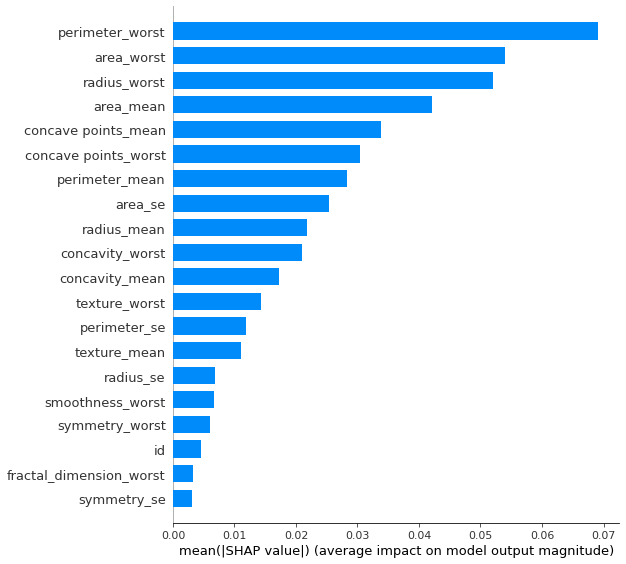

In [60]:
#Plot a SHAP summary plot using all the features in the data
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar")

Based on the bar chart above, perimeter_worst, area_worst, radius_worst and area_mean are the top 4 features that help to determine whether the sample is benign or malignant, which can be frequently seen in the SHAP force plot above as well. Whereas fractal_dimension_worst and symmetry_se are the least affecting features.  

#Task 7

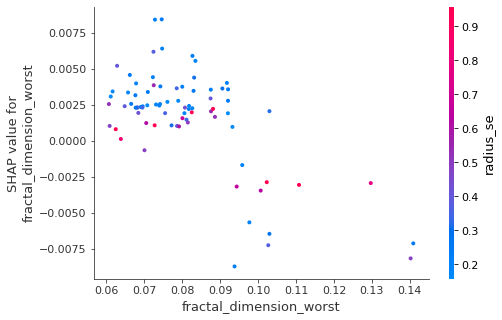

In [61]:
#Plot a SHAP dependence plot using all features in the data
shap.initjs()

shap.dependence_plot(ind=X_test.columns.all(), shap_values=shap_values[:len(X_test),:], features = X_test.values, feature_names=X_test.columns)

Higher fractal_dimension_worst value tends to push the model's prediction decisions to predict the sample is benign.